In [1]:
import sympy as sp

In [2]:
A = sp.Symbol("A")
d = sp.Symbol("d")
t = sp.Symbol("t")
c = sp.Symbol("c")
eta = sp.Symbol("\eta")
# theta = sp.Symbol("\theta")
Gamma1 = sp.Symbol("\Gamma_1")
Gammaphi = sp.Symbol("\Gamma_\phi")

L1 = Gamma1/2*sp.Matrix([[1,-sp.exp(-sp.I*eta)/2],[-sp.exp(-sp.I*eta)/2,-1]])
Lphi = -Gammaphi/2*sp.Matrix([[0,sp.exp(-sp.I*eta)],[sp.exp(sp.I*eta),0]])

expHp = sp.Matrix([[sp.cos(A*d*t/2)-sp.I*c/sp.sqrt(1+c**2)*sp.sin(A*d*t/2),\
                    sp.I*sp.sin(A*d*t/2)/sp.sqrt(1+c**2)],\
                   [sp.I*sp.sin(A*d*t/2)/sp.sqrt(1+c**2),\
                   sp.cos(A*d*t/2)+sp.I*c/sp.sqrt(1+c**2)*sp.sin(A*d*t/2)]])
expHm = sp.Matrix([[sp.cos(A*d*t/2)+sp.I*c/sp.sqrt(1+c**2)*sp.sin(A*d*t/2),\
                    -sp.I*sp.sin(A*d*t/2)/sp.sqrt(1+c**2)],\
                   [-sp.I*sp.sin(A*d*t/2)/sp.sqrt(1+c**2),\
                   sp.cos(A*d*t/2)-sp.I*c/sp.sqrt(1+c**2)*sp.sin(A*d*t/2)]])

In [58]:
I1 = sp.integrate(expHp*L1*expHm,(t,0,t),conds='none')

Iphi = sp.integrate(expHp*Lphi*expHm,(t,0,t),conds='none')
# res1 = 1/(2*sp.pi) * sp.integrate(I1,(eta,0,2*sp.pi),conds='none')
I1


In [107]:
rho0 = sp.Matrix([[1,sp.exp(-sp.I*eta)],[sp.exp(sp.I*eta),1]])/2
integrand = rho0*(I1+Iphi)
res = sp.integrate(integrand[0,0] + integrand[1,1],(eta,0,2*sp.pi),conds="none")/(2*sp.pi)

In [108]:
# (res[0,0]*2*sp.pi).args[0]
res

(-2*A*\Gamma_1*d*t*exp(I*A*d*t) - 4*A*\Gamma_\phi*d*t*exp(I*A*d*t) + I*\Gamma_1*c**2*exp(2*I*A*d*t) - I*\Gamma_1*c**2 - I*\Gamma_1*c*sqrt(c**2 + 1)*exp(2*I*A*d*t) + 2*I*\Gamma_1*c*sqrt(c**2 + 1)*exp(I*A*d*t) - I*\Gamma_1*c*sqrt(c**2 + 1) + 4*I*\Gamma_\phi*c**2*exp(2*I*A*d*t) - 4*I*\Gamma_\phi*c**2 + 2*I*\Gamma_\phi*exp(2*I*A*d*t) - 2*I*\Gamma_\phi)/(16*A*c**2*d*exp(I*A*d*t) + 16*A*d*exp(I*A*d*t))

In [120]:
Fres = sp.simplify(sp.collect(-res,(Gamma1,Gammaphi)))
Fres

(\Gamma_1*(2*A*d*t*exp(I*A*d*t) - I*c**2*exp(2*I*A*d*t) + I*c**2 + I*c*sqrt(c**2 + 1)*exp(2*I*A*d*t) - 2*I*c*sqrt(c**2 + 1)*exp(I*A*d*t) + I*c*sqrt(c**2 + 1)) + 2*\Gamma_\phi*(2*A*d*t*exp(I*A*d*t) - 2*I*c**2*exp(2*I*A*d*t) + 2*I*c**2 - I*exp(2*I*A*d*t) + I))*exp(-I*A*d*t)/(16*A*d*(c**2 + 1))

In [121]:
sp.simplify((sp.collect(Fres.rewrite(sp.cos),(Gamma1,Gammaphi))))

(A*\Gamma_1*d*t + 2*A*\Gamma_\phi*d*t + \Gamma_1*c**2*sin(A*d*t) + I*\Gamma_1*c*sqrt(c**2 + 1)*cos(A*d*t) - I*\Gamma_1*c*sqrt(c**2 + 1) + 4*\Gamma_\phi*c**2*sin(A*d*t) + 2*\Gamma_\phi*sin(A*d*t))/(8*A*d*(c**2 + 1))

In [202]:
res = 0
for etaval in [0,sp.pi/2,sp.pi,3*sp.pi/2]:
    res += integrand[0,0].subs({eta:etaval}) + integrand[1,1].subs({eta:etaval})
Fres = sp.simplify(sp.collect(-res/4,(Gamma1,Gammaphi)))
Fres

(2*A*\Gamma_1*d*t*exp(I*A*d*t) + 4*A*\Gamma_\phi*d*t*exp(I*A*d*t) - I*\Gamma_1*c**2*exp(2*I*A*d*t) + I*\Gamma_1*c**2 + I*\Gamma_1*c*sqrt(c**2 + 1)*exp(2*I*A*d*t) - 2*I*\Gamma_1*c*sqrt(c**2 + 1)*exp(I*A*d*t) + I*\Gamma_1*c*sqrt(c**2 + 1) - 4*I*\Gamma_\phi*c**2*exp(2*I*A*d*t) + 4*I*\Gamma_\phi*c**2 - 2*I*\Gamma_\phi*exp(2*I*A*d*t) + 2*I*\Gamma_\phi)*exp(-I*A*d*t)/(16*A*d*(c**2 + 1))

In [203]:
FINALRES = sp.collect(sp.simplify(Fres.rewrite(sp.cos)),(Gamma1,Gammaphi))

In [204]:
FINALRES

(\Gamma_1*(A*d*t + c**2*sin(A*d*t) + I*c*sqrt(c**2 + 1)*cos(A*d*t) - I*c*sqrt(c**2 + 1)) + \Gamma_\phi*(2*A*d*t + 4*c**2*sin(A*d*t) + 2*sin(A*d*t)))/(8*A*d*(c**2 + 1))

In [196]:
# FINALRES
omegaQ = 2.482542369190881
omegaD = 2.5
Aval = 5
dval = 0.294951


substitution = {
    Gamma1:10e-9,
    Gammaphi:1e5*1e-9,
    d: dval,
    A: Aval,
    c: (omegaQ - omegaD)/(Aval*dval),
    t: 10,
}
FINALRES.subs(substitution)*100

0.0499958275157958

In [197]:
import numpy as np
results = []
# omegaDs = np.linspace(-2.5,10,1000)
# for omegaD in omegaDs:
#     substitution["c"]=(omegaQ - omegaD)/(Aval*dval)
#     results.append(FINALRES.subs(substitution))

ts = np.linspace(0.1,30,1000)
for t in ts:
    substitution["t"]=t
    results.append(FINALRES.subs(substitution))
results = np.array(results)

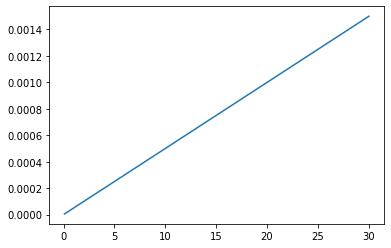

In [198]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# ax.plot(omegaDs,results*1e7)
# ax.vlines(omegaQ,0,5e-4)
ax.plot(ts,results)
# ax.vlines(omegaQ,0,5e-4)

In [156]:
FINALRES# (2*A*d*t/(4*A*d*(c**2+1))).subs(substitution)

(\Gamma_1*(2*A*c*d*t + A*d*t + c**2*sin(A*d*t) - 2*c*sin(A*d*t)) + \Gamma_\phi*(2*A*d*t + 2*c**2*sin(A*d*t)))/(4*A*d*(c**2 + 1))

# Let the computer do everything

In [212]:
A = sp.Symbol("A")
d = sp.Symbol("d")
t = sp.Symbol("t")
c = sp.Symbol("c")
eta = sp.Symbol("\eta")
theta = sp.Symbol("\\theta")
Gamma1 = sp.Symbol("\Gamma_1")
Gammaphi = sp.Symbol("\Gamma_\phi")

In [213]:
expHp = sp.Matrix([[sp.cos(A*d*t/2)-sp.I*c/sp.sqrt(1+c**2)*sp.sin(A*d*t/2),\
                    sp.I*sp.sin(A*d*t/2)/sp.sqrt(1+c**2)],\
                   [sp.I*sp.sin(A*d*t/2)/sp.sqrt(1+c**2),\
                   sp.cos(A*d*t/2)+sp.I*c/sp.sqrt(1+c**2)*sp.sin(A*d*t/2)]])
expHm = sp.Matrix([[sp.cos(A*d*t/2)+sp.I*c/sp.sqrt(1+c**2)*sp.sin(A*d*t/2),\
                    -sp.I*sp.sin(A*d*t/2)/sp.sqrt(1+c**2)],\
                   [-sp.I*sp.sin(A*d*t/2)/sp.sqrt(1+c**2),\
                   sp.cos(A*d*t/2)-sp.I*c/sp.sqrt(1+c**2)*sp.sin(A*d*t/2)]])

In [297]:
expHp

Matrix([
[-I*c*sin(A*d*t/2)/sqrt(c**2 + 1) + cos(A*d*t/2),                  I*sin(A*d*t/2)/sqrt(c**2 + 1)],
[                  I*sin(A*d*t/2)/sqrt(c**2 + 1), I*c*sin(A*d*t/2)/sqrt(c**2 + 1) + cos(A*d*t/2)]])

In [214]:
rho = sp.Matrix([[sp.cos(theta/2)**2,sp.cos(theta/2)*sp.sin(theta/2)*sp.exp(-sp.I*eta)],
                 [sp.cos(theta/2)*sp.sin(theta/2)*sp.exp(sp.I*eta),sp.sin(theta/2)**2]])
L1 = sp.Matrix([[0,1],[0,0]])
Lphi = sp.Matrix([[0,0],[0,1]])

In [215]:
# rhot = expHm*rho*expHp
# integrand = Gamma1*(L1*rhot*L1.adjoint() - (L1.adjoint()*L1*rhot + rhot*L1.adjoint()*L1)/2) +\
#             2*Gammaphi*(Lphi*rhot*Lphi.adjoint() - (Lphi.adjoint()*Lphi*rhot + rhot*Lphi.adjoint()*Lphi)/2)
# integrand = expHp*integrand*expHm

rhot = expHm*rho*expHp
I1 = L1*rhot*L1.adjoint() - (L1.adjoint()*L1*rhot + rhot*L1.adjoint()*L1)/2
I1 = sp.expand(expHp*sp.expand(sp.simplify(I1))*expHm)

I2 = Lphi*rhot*Lphi.adjoint() - (Lphi.adjoint()*Lphi*rhot + rhot*Lphi.adjoint()*Lphi)/2
I2 = sp.expand(expHp*sp.expand(sp.simplify(I2))*expHm)


# integrand = Gamma1*(L1*rhot*L1.adjoint() - (L1.adjoint()*L1*rhot + rhot*L1.adjoint()*L1)/2) +\
#             2*Gammaphi*(Lphi*rhot*Lphi.adjoint() - (Lphi.adjoint()*Lphi*rhot + rhot*Lphi.adjoint()*Lphi)/2)
# integrand = expHp*integrand*expHm

In [244]:
I1

Matrix([
[c**4*exp(I*\eta)*sin(\theta/2)**2*sin(A*d*t/2)**4/(c**4*exp(I*\eta) + 2*c**2*exp(I*\eta) + exp(I*\eta)) + c**4*exp(I*\eta)*sin(\theta/2)**2*sin(A*d*t/2)**2*cos(A*d*t/2)**2/(c**4*exp(I*\eta) + 2*c**2*exp(I*\eta) + exp(I*\eta)) - c**3*exp(2*I*\eta)*sin(\theta/2)*sin(A*d*t/2)**4*cos(\theta/2)/(2*c**4*exp(I*\eta) + 4*c**2*exp(I*\eta) + 2*exp(I*\eta)) + c**3*exp(2*I*\eta)*sin(\theta/2)*sin(A*d*t/2)**2*cos(\theta/2)*cos(A*d*t/2)**2/(2*c**4*exp(I*\eta) + 4*c**2*exp(I*\eta) + 2*exp(I*\eta)) - c**3*sin(\theta/2)*sin(A*d*t/2)**4*cos(\theta/2)/(2*c**4*exp(I*\eta) + 4*c**2*exp(I*\eta) + 2*exp(I*\eta)) + c**3*sin(\theta/2)*sin(A*d*t/2)**2*cos(\theta/2)*cos(A*d*t/2)**2/(2*c**4*exp(I*\eta) + 4*c**2*exp(I*\eta) + 2*exp(I*\eta)) + c**3*exp(2*I*\eta)*sin(\theta/2)*sin(A*d*t/2)**4*cos(\theta/2)/(c**4*exp(I*\eta) + 2*c**2*exp(I*\eta) + exp(I*\eta)) + c**3*sin(\theta/2)*sin(A*d*t/2)**4*cos(\theta/2)/(c**4*exp(I*\eta) + 2*c**2*exp(I*\eta) + exp(I*\eta)) + 2*c**2*exp(I*\eta)*sin(\theta/2)**2*sin(A*

In [216]:
substitution = {
    sp.cos(A*d*t/2)**2*sp.sin(A*d*t/2)**2: t/8 - sp.sin(2*A*d*t)/(16*A*d),
    sp.cos(A*d*t/2)**3*sp.sin(A*d*t/2): -(sp.cos(A*d*t/2)**4 - 1)/(2*A*d),
    sp.cos(A*d*t/2)*sp.sin(A*d*t/2)**3: sp.sin(A*d*t/2)**4/(2*A*d),
    sp.sin(A*d*t/2)**4: (6*A*d*t-8*sp.sin(A*d*t)+sp.sin(2*A*d*t))/(16*A*d),
    sp.cos(A*d*t/2)**4: (6*A*d*t + 8*sp.sin(A*d*t) + sp.sin(2*A*d*t))/(16*A*d)
}

In [298]:
rho

Matrix([
[                       cos(\theta/2)**2, exp(-I*\eta)*sin(\theta/2)*cos(\theta/2)],
[exp(I*\eta)*sin(\theta/2)*cos(\theta/2),                         sin(\theta/2)**2]])

In [299]:
tmp_res = rho*(Gamma1*I1.subs(substitution) + 2*Gammaphi*I2.subs(substitution))

In [300]:
Fres = -(tmp_res[0,0] + tmp_res[1,1])

In [28]:
# xp_dec = sp.collect(Fres.subs({eta:0,theta:sp.pi/2}),(Gamma1,Gammaphi))
xp_dec = sp.simplify(Fres.subs({eta:0,theta:sp.pi/2}))
xm_dec = sp.simplify(Fres.subs({eta:sp.pi,theta:sp.pi/2}))
yp_dec = sp.simplify(Fres.subs({eta:sp.pi/2,theta:sp.pi/2}))
ym_dec = sp.simplify(Fres.subs({eta:3*sp.pi/2,theta:sp.pi/2}))
zp_dec = sp.simplify(Fres.subs({eta:0,theta:sp.pi}))
zm_dec = sp.simplify(Fres.subs({eta:0,theta:0}))

In [68]:
avg_Fres = sp.collect(sp.simplify((xp_dec + xm_dec + yp_dec + ym_dec + zp_dec + zm_dec)/6),(Gamma1,Gammaphi))
avg_Fres

(\Gamma_1*(16*A*c**2*d*t*cos(A*d*t) + 16*A*c**2*d*t + 24*A*d*t*cos(A*d*t) + 8*A*d*t + 4*sin(A*d*t)**3 - 3*sin(A*d*t) + sin(3*A*d*t)) + \Gamma_\phi*(32*A*c**2*d*t*cos(A*d*t) + 16*A*d*t*cos(A*d*t) + 16*A*d*t - 8*sin(A*d*t)**3 + 6*sin(A*d*t) - 2*sin(3*A*d*t)))/(96*A*d*(c**2 + 1))

In [171]:
import numpy as np
omegaQ = 2.482542369190881
omegaD = 3
Aval = 5
dval = 0.294951


substitution = {
    Gamma1:10e-9,
    Gammaphi:5e6*1e-9,
    d: dval,
    A: Aval,
    c: (omegaQ - omegaD)/(Aval*dval),
    t: 10,
}

results = []
ts = np.linspace(0.1,30,1000)
for t in ts:
    substitution["t"]=t
    substitution["A"]=sp.pi/(dval*t)
    results.append(avg_Fres.subs(substitution))
results = np.array(results)
# avg_Fres.subs(substitution)*100

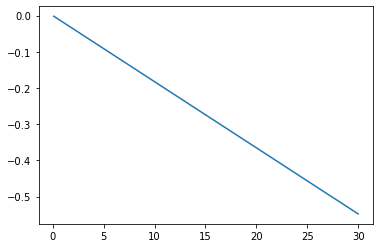

In [76]:
import matplotlib.pyplot as plt
plt.plot(ts,results*100)
# plt.yscale("log")

In [79]:
Fres

-(\Gamma_1*(c**4*(t/8 - sin(2*A*d*t)/(16*A*d))*sin(\theta/2)*cos(\theta/2)/(2*c**4*exp(I*\eta) + 4*c**2*exp(I*\eta) + 2*exp(I*\eta)) - 2*c**3*(t/8 - sin(2*A*d*t)/(16*A*d))*exp(I*\eta)*sin(\theta/2)**2/(c**4*exp(I*\eta) + 2*c**2*exp(I*\eta) + exp(I*\eta)) - c**2*(t/8 - sin(2*A*d*t)/(16*A*d))*exp(2*I*\eta)*sin(\theta/2)*cos(\theta/2)/(2*c**4*exp(I*\eta) + 4*c**2*exp(I*\eta) + 2*exp(I*\eta)) + c**2*(t/8 - sin(2*A*d*t)/(16*A*d))*sin(\theta/2)*cos(\theta/2)/(2*c**4*exp(I*\eta) + 4*c**2*exp(I*\eta) + 2*exp(I*\eta)) - 3*c**2*(t/8 - sin(2*A*d*t)/(16*A*d))*sin(\theta/2)*cos(\theta/2)/(2*c**2*exp(I*\eta) + 2*exp(I*\eta)) - 2*c*(t/8 - sin(2*A*d*t)/(16*A*d))*exp(I*\eta)*sin(\theta/2)**2/(c**4*exp(I*\eta) + 2*c**2*exp(I*\eta) + exp(I*\eta)) + c*(t/8 - sin(2*A*d*t)/(16*A*d))*exp(I*\eta)*sin(\theta/2)**2/(2*c**2*exp(I*\eta) + 2*exp(I*\eta)) - c*(t/8 - sin(2*A*d*t)/(16*A*d))*exp(I*\eta)*cos(\theta/2)**2/(2*c**2*exp(I*\eta) + 2*exp(I*\eta)) - (t/8 - sin(2*A*d*t)/(16*A*d))*exp(2*I*\eta)*sin(\theta/2)*co

In [301]:
Fres_out = sp.expand(sp.collect(Fres,(sp.exp(sp.I*eta))))

In [302]:
Fres_out2 = sp.collect(Fres_out,sp.exp(sp.I*eta))

In [251]:
# Fres_out2.coeff(sp.exp(sp.I*eta),0)

In [264]:
(sp.exp(sp.I*eta)*A + sp.exp(-sp.I*eta)*d + c).coeff((sp.exp(sp.I*eta),sp.exp(-sp.I*eta)),0)#.coeff(,0)#.subs({sp.zoo:0})

A*exp(I*\eta) + c + d*exp(-I*\eta)

In [303]:
# eta_sub = {sp.exp(-2*sp.I*eta):0,
#            sp.exp(-1*sp.I*eta):0,
#            sp.exp(sp.I*eta):0,
#            sp.exp(2*sp.I*eta):0}
# Fres_eta_avg = Fres_out2.subs(eta_sub).subs({sp.zoo:0})
Fres_eta_avg = Fres_out2.coeff(sp.exp(-2*sp.I*eta),0).coeff(sp.exp(-sp.I*eta),0).coeff(sp.exp(sp.I*eta),0).coeff(sp.exp(2*sp.I*eta),0)

In [313]:
# theta_sub = {sp.sin(theta/2)**4:3/8,
#              sp.cos(theta/2)**4:3/8,
#              sp.sin(theta/2)**2*sp.cos(theta/2)**2:1/8,
#              sp.sin(theta/2)**3*sp.cos(theta/2):1/(2*sp.pi),
#              sp.sin(theta/2)*sp.cos(theta/2)**3:1/(2*sp.pi)}
theta_sub = {sp.sin(theta/2)**4:1/3,
             sp.cos(theta/2)**4:1/3,
             sp.sin(theta/2)**2*sp.cos(theta/2)**2:1/6,
             sp.sin(theta/2)**3*sp.cos(theta/2):sp.pi/16,
             sp.sin(theta/2)*sp.cos(theta/2)**3:sp.pi/16}

In [314]:
# sp.collect(sp.cos(theta/2)*sp.sin(theta) + 5*sp.cos(theta/2)+sp.sin(theta)*sp.cos(theta),sp.cos(theta/2))
Fres_exp = Fres_eta_avg.subs(theta_sub)

In [315]:
Fres_exp_clean = sp.factor(Fres_exp)

In [316]:
Fres_exp_clean2 = Fres_exp_clean#.subs({sp.zoo:0})

In [317]:
Fres_final = sp.simplify(Fres_exp_clean2)

In [332]:
# FF = sp.simplify(sp.collect(sp.nsimplify(Fres_final),(Gamma1,Gammaphi)))
FF = sp.simplify(sp.collect(Fres_final,(Gamma1,Gammaphi)))

In [333]:
detuning = sp.symbols("\Delta")
FF = sp.simplify(FF.subs({c:detuning/(A*d)}))

In [334]:
FF1 = sp.trigsimp(sp.collect(sp.factor(FF),(Gamma1,Gammaphi)))

In [337]:
sp.collect(sp.collect(FF1,A*d),detuning)#.subs({A*d:0})

(1.0*\Gamma_1*(0.333333333333333*A**7*d**7*t + \Delta**6*(0.333333333333333*A*d*t - 3.46944695195361e-18*sin(2*A*d*t)) + \Delta**4*(1.0*A**3*d**3*t + A**2*d**2*(5.55111512312578e-17*sin(A*d*t) - 1.38777878078145e-17*sin(2*A*d*t))) + \Delta**2*(1.0*A**5*d**5*t - 6.93889390390723e-18*A**4*d**4*sin(2*A*d*t))) + 1.0*\Gamma_\phi*(0.333333333333333*A**7*d**7*t + 3.46944695195361e-18*A**6*d**6*sin(2*A*d*t) + 1.0*A**5*\Delta**2*d**5*t + \Delta**6*(0.333333333333333*A*d*t - 6.93889390390723e-18*sin(2*A*d*t)) + \Delta**4*(1.0*A**3*d**3*t + 5.55111512312578e-17*A**2*d**2*sin(A*d*t))))/(A*d*(A**2*d**2 + \Delta**2)**3)

In [292]:
sp.print_latex(sp.collect(sp.collect(FF1,A*d),detuning))

\frac{\Gamma_{1} \left(A^{4} d^{4} \left(72 t \cos{\left(A d t \right)} + 16 t\right) + A^{3} d^{3} \left(12 t \sin{\left(A d t \right)} - 8 \sin^{3}{\left(A d t \right)} - 8 \sin{\left(A d t \right)}\right) + A^{2} d^{2} \left(\Delta^{2} \left(96 t \cos{\left(A d t \right)} + 64 t\right) + \cos{\left(A d t \right)} - \cos{\left(3 A d t \right)}\right) + \Delta^{4} \left(32 t \cos{\left(A d t \right)} + 64 t\right) + \Delta^{2} \left(8 A d \sin{\left(2 A d t \right)} + 16 \sin^{2}{\left(A d t \right)}\right)\right) + \Gamma_{\phi} \left(A^{4} d^{4} \left(48 t \cos{\left(A d t \right)} + 32 t\right) + A^{3} d^{3} \left(- 24 t \sin{\left(A d t \right)} + 16 \sin^{3}{\left(A d t \right)} + 16 \sin{\left(A d t \right)}\right) + A^{2} d^{2} \left(\Delta^{2} \left(128 t \cos{\left(A d t \right)} + 64 t\right) - 2 \cos{\left(A d t \right)} + 2 \cos{\left(3 A d t \right)}\right) + 64 \Delta^{4} t \cos{\left(A d t \right)} + \Delta^{2} \left(- 16 A d \sin{\left(2 A d t \right)} - 32 \sin^{2}{\l

In [277]:
sp.collect(FF1,A*d).subs({t:sp.pi/(A*d),detuning: 0}).subs({Gamma1:10e-9,
    Gammaphi:5e6*1e-9,
    d: -dval,
    A: 1,})

0.00105950543480103*pi

In [194]:
omegaQ = 2.482542369190881
omegaD = 3
Aval = 1
dval = 0.294951


substitution = {
    Gamma1:10e-9,
    Gammaphi:1e5*1e-9,
    d: dval,
    A: Aval,
    detuning: omegaQ - omegaD,
    # t: 10,
}
substitution["t"] = sp.pi/(Aval*dval)

In [195]:
FF.subs(substitution)

-6.52475975899305e-5*pi - 5.40010818463898e-7*cos(pi/2251799813685248) + 5.40010818463898e-7

In [116]:
tmp_out = sp.collect(Fres_exp,(Gamma1,Gammaphi))

In [119]:
Fres_exp_clean = sp.collect(tmp_out,(A*d*t))

In [121]:
O1 = sp.factor(Fres_exp_clean)

In [126]:
O1

0

In [ ]:
import pickle
with open("tmp_out.txt", "w") as outf:
    pickle.dump(integrated, outf)

In [ ]:
omega = sp.Symbol("\omega")


In [16]:
# tmp_res = sp.collect(L1*rhot*L1.adjoint() - (L1.adjoint()*L1*rhot + rhot*L1.adjoint()*L1)/2,A*d*t/2)
# tmp_res
# sp.collect
# tmp_res = sp.expand(_)
tmp_res

Matrix([
[                                                                                                                                                                              c**2*exp(I*\eta)*sin(\theta/2)**2*sin(A*d*t/2)**2/(c**2*exp(I*\eta) + exp(I*\eta)) + c**2*exp(I*\eta)*sin(\theta/2)**2*cos(A*d*t/2)**2/(c**2*exp(I*\eta) + exp(I*\eta)) + c*exp(2*I*\eta)*sin(\theta/2)*sin(A*d*t/2)**2*cos(\theta/2)/(c**2*exp(I*\eta) + exp(I*\eta)) + c*sin(\theta/2)*sin(A*d*t/2)**2*cos(\theta/2)/(c**2*exp(I*\eta) + exp(I*\eta)) + I*sqrt(c**2 + 1)*exp(2*I*\eta)*sin(\theta/2)*sin(A*d*t/2)*cos(\theta/2)*cos(A*d*t/2)/(c**2*exp(I*\eta) + exp(I*\eta)) - I*sqrt(c**2 + 1)*sin(\theta/2)*sin(A*d*t/2)*cos(\theta/2)*cos(A*d*t/2)/(c**2*exp(I*\eta) + exp(I*\eta)) + exp(I*\eta)*sin(\theta/2)**2*cos(A*d*t/2)**2/(c**2*exp(I*\eta) + exp(I*\eta)) + exp(I*\eta)*sin(A*d*t/2)**2*cos(\theta/2)**2/(c**2*exp(I*\eta) + exp(I*\eta)), c**2*sin(\theta/2)*sin(A*d*t/2)**2*cos(\theta/2)/(2*c**2*exp(I*\eta) + 2*exp(I*\eta))